# Statistical Modeling Tools

Play with the notebook by 
https://github.com/madHatter106/chlorophyll_models

## Grid method discussion 

The mean value $\mu$ and the standard deviation $\sigma$ 
of a set of data can be obtained by scaning through a set of $\mu$ and $\sigma$,
and evaluate the joint probability of all data points. 
The parameters that give the maximum joint probability would be the best value for 
both $\mu$ and $\sigma$. We call this the grid method. 

We want to prove that how the grid method can recover the original definition of $\mu$ and $\sigma$: $$\mu=\frac{1}{N} \sum^N_{i=1} a_i\\
    \sigma=\sqrt{\frac{1}{N}\sum^N_{i=1} (a_i-\mu)^2}$$. 

In order to prove the connection, we recall the definition of a normal distribution:

$$n(x)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left[-\frac{(x-\mu)^2}{2 \sigma^2}\right]$$.

Assuming an arbitrary $\mu'$ and $\sigma'$, we can evalute the joint probability of a set of data $a_i$ with $i=1,...,N$:

$$P(a_1,..., a_N)=P(a_1)...P(a_N)\\
=n(a_1|\mu', \sigma')...n(a_N|\mu', \sigma')\\
=\frac{1}{(2\pi \sigma'^2)^{N/2}}\exp\left[-\frac{\sum_{i=1}^N(a_i-\mu')^2}{2 \sigma'^2}\right]\\
$$



With the grid method, a set of $\mu$ and $\sigma$ are scanned through to find the maximum $P(a_1,..., a_N)$. This equivalent to find zero first order derivative of the probability function:
$$\frac{\partial }{\partial \mu}P(a_1,..., a_N)=0\\
\frac{\partial }{\partial \sigma}P(a_1,..., a_N)=0\\
$$

From the first derivative, we have
$$\frac{\partial }{\partial \mu} \exp\left[-\frac{\sum_{i=1}^N(a_i-\mu)^2}{2 \sigma^2}\right]=0\\
\sum_{i=1}^N (a_i-\mu)=0
$$

Therefore we have
$$
\mu=\frac{1}{N} \sum_{i=1}^N a_i
$$

Similary we can prove the formula for $\sigma$. 

The reasoning also help us to understand the meaning for the mean and standard deviation, which are the parameters resulting in the maximum joint probability of the dataset.

## discuss with dataset

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm, uniform
import pandas as pd

In [96]:
#test datasets
chlav0=np.array([-0.94802673, -0.46852108, -0.06229659,  0.28936595,  1.09820055,
       -0.51144928, -0.85387196, -1.13076828, -1.07058107, -0.64206515,
        0.99159817,  0.34795417,  1.15687006,  0.27137687, -1.39794001,
        0.08134731, -0.79588002, -0.94309515,  0.00603795, -1.36653154,
        1.08664096, -0.05998184,  0.25503116, -1.15490196,  0.36571256,
       -1.01772877,  0.29622629,  0.67271652, -1.03151705, -0.1942953 ,
        0.08069862, -0.18641901, -0.37675071, -1.1739252 , -0.31722335,
        0.6437426 ,  0.90276414,  0.95999484, -0.44855   ,  0.04700213,
        0.47082782, -0.11013828, -0.32790214, -0.67778071, -0.58508233,
        1.17744126, -0.7721133 , -0.01547269, -1.43179828, -1.        ])

chlav1=chlav0[:10]

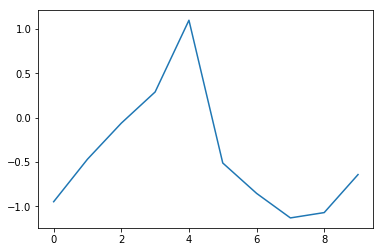

In [82]:
plt.plot(chlav1)

(array([3., 1., 3., 0., 1., 0., 1., 0., 0., 1.]),
 array([-1.13076828, -0.9078714 , -0.68497451, -0.46207763, -0.23918075,
        -0.01628386,  0.20661302,  0.4295099 ,  0.65240678,  0.87530367,
         1.09820055]),
 <a list of 10 Patch objects>)

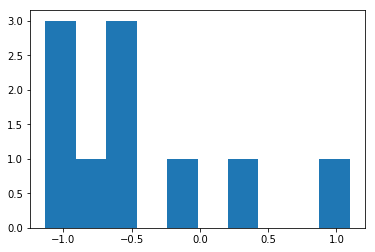

In [83]:
plt.hist(chlav1)

### compare the probability for different mu and sigma

0 0.5
joint prob: 3.978562889011128e-07
0 0.1
joint prob: 3.290341462945082e-130
0 2
joint prob: 4.5716297722573965e-08


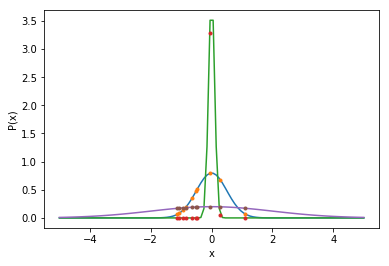

In [84]:
h = np.linspace(-5, 5, num=100)
μ_prior = 0 #mean
σ_prior = 0.5 #standard deviation
# compute probability at each a h
print(μ_prior,σ_prior)
p_h = norm.pdf(h, loc=μ_prior, scale=σ_prior) 
plt.plot(h, p_h); 
plt.plot(chlav1,norm.pdf(chlav1, μ_prior, σ_prior),'.')
print("joint prob:",np.exp(np.sum(np.log(norm.pdf(chlav1, μ_prior, σ_prior)))))

μ_prior = 0 #mean
σ_prior = 0.1 #standard deviation
# compute probability at each a h
print(μ_prior,σ_prior)
p_h = norm.pdf(h, loc=μ_prior, scale=σ_prior) 
plt.plot(h, p_h); 
plt.plot(chlav1,norm.pdf(chlav1, μ_prior, σ_prior),'.')
print("joint prob:",np.exp(np.sum(np.log(norm.pdf(chlav1, μ_prior, σ_prior)))))

μ_prior = 0 #mean
σ_prior = 2 #standard deviation
# compute probability at each a h
print(μ_prior,σ_prior)
p_h = norm.pdf(h, loc=μ_prior, scale=σ_prior) 
plt.plot(h, p_h); plt.ylabel('P(x)'); plt.xlabel('x');
plt.plot(chlav1,norm.pdf(chlav1, μ_prior, σ_prior),'.')
print("joint prob:",np.exp(np.sum(np.log(norm.pdf(chlav1, μ_prior, σ_prior)))))

We can see the first set of parameters generated the maximum probability. 
When plot in a 2d graph for mu and sigma, we will find a peak. 

0 0.5
joint prob: 3.978562889011128e-07


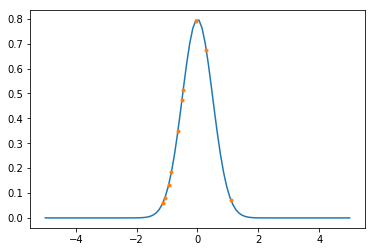

In [85]:
h = np.linspace(-5, 5, num=100)
μ_prior = 0 #mean
σ_prior = 0.5 #standard deviation
# compute probability at each a h
print(μ_prior,σ_prior)
p_h = norm.pdf(h, loc=μ_prior, scale=σ_prior) 
plt.plot(h, p_h); 
plt.plot(chlav1,norm.pdf(chlav1, μ_prior, σ_prior),'.')
print("joint prob:",np.exp(np.sum(np.log(norm.pdf(chlav1, μ_prior, σ_prior)))))

### Influence of  weak prior

In [37]:
μv = np.linspace(-2, 2, num=200) # μ-axi
σv = np.linspace(0, 2, num=200) # σ-axis

In [59]:
#data_prob=np.array([np.exp(np.sum(norm.logpdf(chlav1, μ, σ)))\
#     for μ in μv for σ in σv])
#plt.imshow(data_prob)

In [86]:
#######add prior knoledge##############
df_grid = pd.DataFrame([[μ_i, σ_i]
                        for σ_i in σv for μ_i in μv], columns=['μ', 'σ'])

μ_prior = norm.logpdf(df_grid.μ, 1, 1)
σ_prior = uniform.logpdf(df_grid.σ, 0, 2)

df_grid['log_prior_prob'] = μ_prior + σ_prior

df_grid['prior_prob'] = np.exp(df_grid.log_prior_prob
                                - df_grid.log_prior_prob.max())

########compute the probability from the data########
df_grid['LL'] = np.sum(norm.logpdf(chlav1.reshape(1, -1),
                                    loc=df_grid.μ.values.reshape(-1, 1),
                                    scale=df_grid.σ.values.reshape(-1, 1)
                                   ), axis=1)
df_grid['data_prob'] = np.exp(df_grid.LL-df_grid.LL.max())

######### posterior ########################
# compute log-probability
df_grid['log_post_prob'] = df_grid.LL + df_grid.log_prior_prob
# convert to straight prob.
df_grid['post_prob'] = np.exp(df_grid.log_post_prob
                               - df_grid.log_post_prob.max())

In [87]:
df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
μ                 40000 non-null float64
σ                 40000 non-null float64
log_prior_prob    40000 non-null float64
prior_prob        40000 non-null float64
LL                39800 non-null float64
data_prob         39800 non-null float64
log_post_prob     39800 non-null float64
post_prob         39800 non-null float64
dtypes: float64(8)
memory usage: 2.4 MB


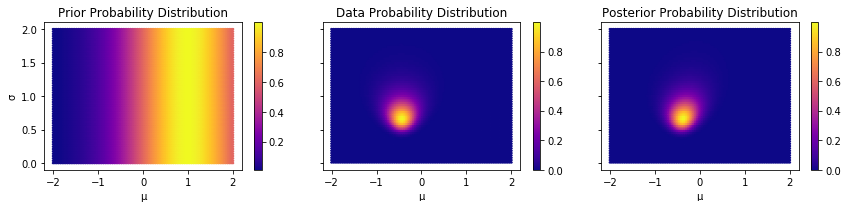

In [88]:
# Plot Multi-Dimensional Prior and Posterior
f, ax = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)
df_grid.plot.hexbin(x='μ', y='σ', C='prior_prob',
                    cmap='plasma', sharex=False, ax=ax[0])
df_grid.plot.hexbin(x='μ', y='σ', C='data_prob',
                    cmap='plasma', sharex=False, ax=ax[1])
df_grid.plot.hexbin(x='μ', y='σ', C='post_prob',
                     cmap='plasma', sharex=False, ax=ax[2]);
ax[0].set_title('Prior Probability Distribution')
ax[1].set_title('Data Probability Distribution')
ax[2].set_title('Posterior Probability Distribution')
f.tight_layout()
#f.savefig('./figJar/Presentation/grid1.svg')

### Influence of strong prior

Note that if there is no information of prior knowlege, both $\mu$ and $\sigma$ can be evaluated directly through their definition, but there is no evaluatiion of the uncertainty.

In [177]:
#######add prior knoledge##############
df_grid = pd.DataFrame([[μ_i, σ_i]
                        for σ_i in σv for μ_i in μv], columns=['μ', 'σ'])

μ_prior = norm.logpdf(df_grid.μ, 1, 0.1)
σ_prior = uniform.logpdf(df_grid.σ, 0, 2)

df_grid['log_prior_prob'] = μ_prior + σ_prior

df_grid['prior_prob'] = np.exp(df_grid.log_prior_prob
                                - df_grid.log_prior_prob.max())

########compute the probability from the data########
df_grid['LL'] = np.sum(norm.logpdf(chlav1.reshape(1, -1),
                                    loc=df_grid.μ.values.reshape(-1, 1),
                                    scale=df_grid.σ.values.reshape(-1, 1)
                                   ), axis=1)
df_grid['data_prob'] = np.exp(df_grid.LL-df_grid.LL.max())

######### posterior ########################
# compute log-probability
df_grid['log_post_prob'] = df_grid.LL + df_grid.log_prior_prob
# convert to straight prob.
df_grid['post_prob'] = np.exp(df_grid.log_post_prob
                               - df_grid.log_post_prob.max())

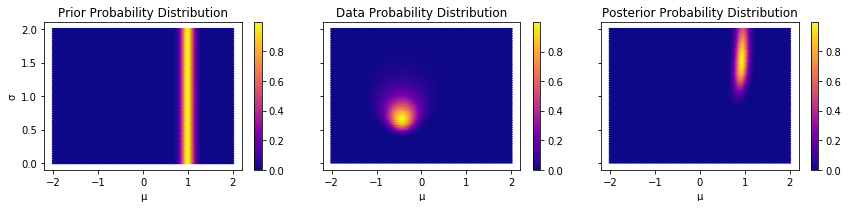

In [178]:
# Plot Multi-Dimensional Prior and Posterior
f, ax = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)
df_grid.plot.hexbin(x='μ', y='σ', C='prior_prob',
                    cmap='plasma', sharex=False, ax=ax[0])
df_grid.plot.hexbin(x='μ', y='σ', C='data_prob',
                    cmap='plasma', sharex=False, ax=ax[1])
df_grid.plot.hexbin(x='μ', y='σ', C='post_prob',
                     cmap='plasma', sharex=False, ax=ax[2]);
ax[0].set_title('Prior Probability Distribution')
ax[1].set_title('Data Probability Distribution')
ax[2].set_title('Posterior Probability Distribution')
f.tight_layout()
#f.savefig('./figJar/Presentation/grid1.svg')

## MCMC/PyMC3 discussion

Understanding of the purpose of grid/MCMC method: 
 - Find the best statistical parameters with prior knowledge. Note that without the consideration of prior knowledge, the parameters may be evaluated directly through the definition of the statistical distribution. 

- Evaluate the statistics of the parameters, and estimate the posterior uncertainty of the parameters
 
Further note on mcmc/pymc3:

- Use all data to evaluate the joint probability for a chain of paramerters.

- We are evaluating a data set which follow certain statistical distribution. This can be shown from its histogram. It is different to the pdf itself. Namely norm.pdf show the normal distribution, but random.normal generate the distribution. 


**Questions**: 

- Data sampled from perfect normal distribution will resutls in less uncertiantiy in parameter estimation using mcmc? NO

- More data points, less uncertainty? YES

- Are the uncertainties for both $\mu$ and $\sigma$ the same as evaluated from both grid method and the mcmc methods?


- How to add prior knowlege in pymc3?

    pm.Normal('likelihood', mu=μ_, sd=σ, observed=data_test)
    add distribution to both mu and sd before evaluation


- How the number of data points influence the contribution of prior knowlege? Note that the total joint probability is the multiplication of the probability of all data point and the prior probability.

    Note that the absolute amplitude (normalization) doesn't matter there, the distribution is more important. More data point will change the weight between the influence of data and prior knowlege.

- How to understand the uncertainties of the parameters from MCMC/PyMC3? Are they intrinsic to the data or related to the methods?*

The following test verify the statements.

In [89]:
import pymc3 as pm

### test 1: data sample from norm dist, large data set

(array([  2.,   1.,   4.,  11.,  23.,  34.,  61.,  88., 109., 117., 128.,
        113., 101.,  87.,  61.,  34.,  10.,   7.,   7.,   2.]),
 array([-5.542158  , -4.90040949, -4.25866098, -3.61691247, -2.97516396,
        -2.33341545, -1.69166694, -1.04991844, -0.40816993,  0.23357858,
         0.87532709,  1.5170756 ,  2.15882411,  2.80057262,  3.44232113,
         4.08406964,  4.72581815,  5.36756665,  6.00931516,  6.65106367,
         7.29281218]),
 <a list of 20 Patch objects>)

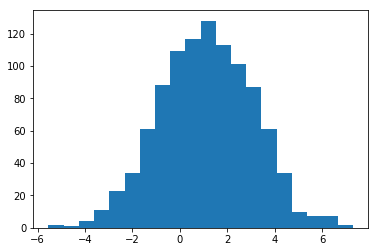

In [188]:
data_test=np.random.normal(1, 2, 1000) 
#data_set are sampled from normal distribution, one set of data
plt.hist(data_test,bins=20)

In [196]:
with pm.Model() as m1:
    μ_ = pm.Normal('μ', mu=0.5, sd=1)
    σ = pm.Uniform('σ', lower=0, upper=4)
    lkl = pm.Normal('likelihood', mu=μ_, sd=σ,
                    observed=data_test)
with m1:
    trace_m1 = pm.sample(2000, tune=1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:02<00:00, 5758.06draws/s]


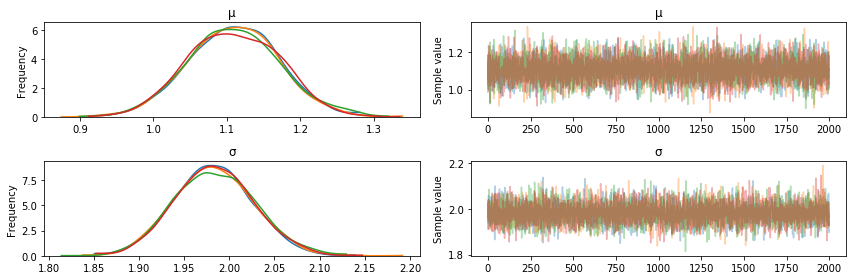

In [197]:
pm.traceplot(trace_m1);

### test 2: data sample from norm dist, small data set

(array([3., 8., 5., 1., 3.]),
 array([-1.7661914 , -0.37311474,  1.01996193,  2.41303859,  3.80611526,
         5.19919193]),
 <a list of 5 Patch objects>)

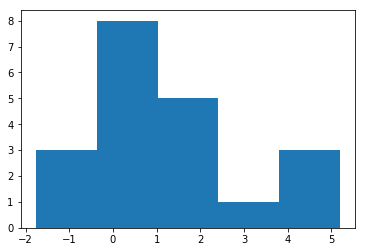

In [185]:
data_test=np.random.normal(1, 2, 20) 
#data_set are sampled from normal distribution, one set of data
plt.hist(data_test,bins=5)

In [186]:
with pm.Model() as m1:
    μ_ = pm.Normal('μ', mu=0.5, sd=1)
    σ = pm.Uniform('σ', lower=0, upper=4)
    lkl = pm.Normal('likelihood', mu=μ_, sd=σ,
                    observed=data_test)
with m1:
    trace_m1 = pm.sample(2000, tune=1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:02<00:00, 5146.59draws/s]
The acceptance probability does not match the target. It is 0.884243006628997, but should be close to 0.8. Try to increase the number of tuning steps.


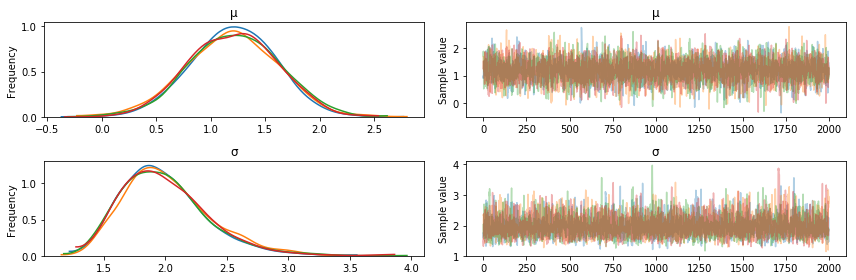

In [187]:
pm.traceplot(trace_m1);

### test 3: data sample from norm dist, small data set, but strong prior

(array([1., 6., 9., 3., 1.]),
 array([-4.35689539, -2.42850797, -0.50012055,  1.42826687,  3.35665428,
         5.2850417 ]),
 <a list of 5 Patch objects>)

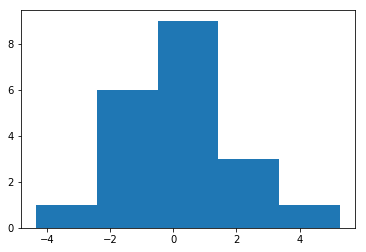

In [179]:
data_test=np.random.normal(1, 2, 20) 
#data_set are sampled from normal distribution, one set of data
plt.hist(data_test,bins=5)

In [182]:
with pm.Model() as m1:
    μ_ = pm.Normal('μ', mu=0.5, sd=0.1)
    σ = pm.Uniform('σ', lower=0, upper=4)
    lkl = pm.Normal('likelihood', mu=μ_, sd=σ,
                    observed=data_test)
with m1:
    trace_m1 = pm.sample(2000, tune=1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:01<00:00, 6061.43draws/s]


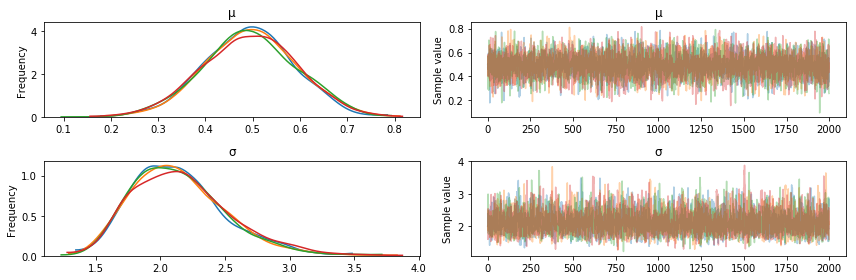

In [183]:
pm.traceplot(trace_m1);

### test 4: test a wrong setup of the input data

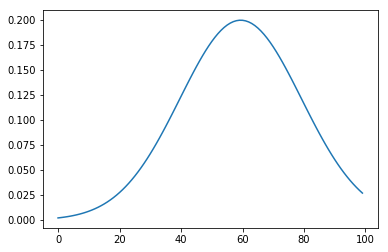

In [161]:
#h=np.random.normal(-5,5,10000)
h=np.linspace(-5,5,100)
data_test=norm.pdf(h, loc=1, scale=2) #data_set are the pdf of h, two set of data
plt.plot(data_test)

(array([18., 12., 10.,  7.,  7.,  6.,  6.,  8.,  8., 18.]),
 array([0.00221592, 0.02193738, 0.04165883, 0.06138028, 0.08110173,
        0.10082318, 0.12054463, 0.14026609, 0.15998754, 0.17970899,
        0.19943044]),
 <a list of 10 Patch objects>)

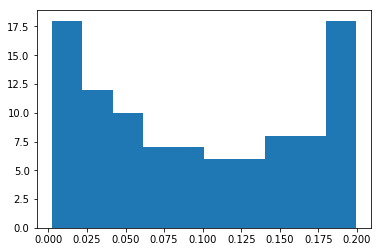

In [162]:
#in this way, we are evaluating something completely different, the values 
#are not in normal distribution at all
plt.hist(data_test)

In [163]:
with pm.Model() as m1:
    μ_ = pm.Normal('μ', mu=1, sd=1)
    σ = pm.Uniform('σ', lower=0, upper=2)
    lkl = pm.Normal('likelihood', mu=μ_, sd=σ,
                    observed=data_test)
with m1:
    trace_m1 = pm.sample(2000, tune=1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:02<00:00, 5996.39draws/s]


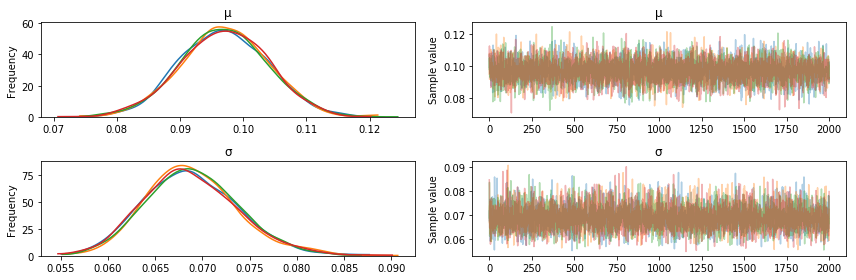

In [164]:
pm.traceplot(trace_m1);